## Exercise(1) Apply PCA algorithm

HW_6 by 21901023 박건우

1.Objective : This code reads specific data from 'mnist.pkl' and clustering with k-means method.

2.Input

'mnist.pkl'

3.Output

the clustered data graph.

Q1.Offset and divisor is for making the dataset into a standard value dataset. So offset is for substracting each data with the min value, and after we divide the value with divisor so we make the data into normal form

Q2.Before normalization, the data range was originally -4 to 8 on x axis and -4 to 4 on y axis. After normalization it becomes 0.0 to 1.0 on both x and y axis.

Q3.randomly

Q4.SSE means literally the sum of squared error.We should define errors to understand sse , in here,errors is the distance between the data and the centroid of closest cluster.

Q5.The terminal condition is (prev_sse/ curr_sse)/curr_sse < tol or the iteration is over 300(predefined value). This means the extent of reassigning data or the extent of difference between prev_sse and curr_sse are less then tol(means stable enough), then terminate the iteration.

In [104]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('... loading data')
with open('mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [105]:
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns=['label'])
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns=['label'])

In [106]:
from sklearn.decomposition import PCA

# YOUR CODE STARTS HERE to get PCA_train_x and PCA_test_x
mypca = PCA(n_components = 2)
PCA_train_x = mypca.fit_transform(train_x)
PCA_test_x = mypca.transform(test_x)

In [107]:
print('PCA_train_x shape: ', PCA_train_x.shape)
print('PCA_test_x shape: ', PCA_test_x.shape)

PCA_train_x shape:  (50000, 2)
PCA_test_x shape:  (10000, 2)


Text(0, 0.5, 'Principal Component 2')

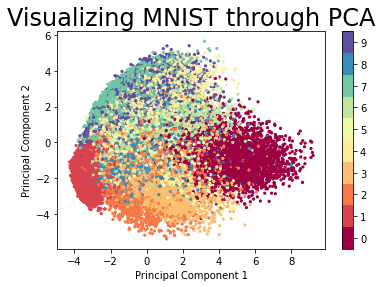

In [108]:
## Plot on the graph
plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1], s = 5, c = train_y['label'],cmap = 'Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('Visualizing MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#### Let's use part of train_x data

In [109]:
sub_PCA_train_x = PCA_train_x[:1000, :]
print('sub_PCA_train_x.shape: ', sub_PCA_train_x.shape)

sub_PCA_train_x.shape:  (1000, 2)


In [110]:
sub_PCA_test_x = PCA_test_x[:1000, :]
print('sub_PCA_test_x.shape: ', sub_PCA_test_x.shape)

sub_PCA_test_x.shape:  (1000, 2)


## Exercise(2) - Hierarchical Clustering

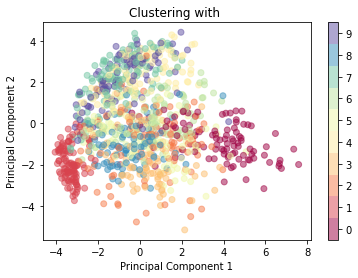

In [111]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

hier = AgglomerativeClustering(n_clusters=10, affinity = 'euclidean')
hier_clusters = hier.fit(sub_PCA_train_x)

## Plot 
plt.scatter(sub_PCA_train_x[:, 0], sub_PCA_train_x[:, 1], c=train_y['label'][:1000], cmap='Spectral', alpha=0.5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Clustering with ")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

----
## Exercise(3) k-means scratch
### Step(1) Normalize data

In [112]:
a = np.array([1, 3, 4])
A = np.tile(a, (3,1))
A

array([[1, 3, 4],
       [1, 3, 4],
       [1, 3, 4]])

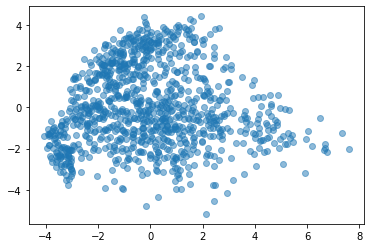

In [137]:
plt.scatter(sub_PCA_train_x[:, 0], sub_PCA_train_x[:, 1], cmap='Spectral', alpha=0.5)

two popular normalization methods
* min-max normalization
* mean-std normalization

In [113]:
def apply_normalizer(dataset, offset, divisor):
    dataset_normalized = np.zeros(dataset.shape)
    N = dataset.shape[0]
    dataset_normalized = dataset - np.tile(offset, (N,1))
    dataset_normalized = dataset_normalized / np.tile(divisor, (N,1))

    return dataset_normalized


def normalize_minmax(dataset):
    minval = dataset.min(0)
    maxval = dataset.max(0)
    
    dataset_normalized = apply_normalizer(dataset, minval, maxval-minval)

    return dataset_normalized, minval, maxval-minval


def normalize_meanstd(dataset):
    meanval = dataset.mean(0)
    stdval = dataset.std(0)

    dataset_normalized = apply_normalizer(dataset, meanval, stdval)

    return dataset_normalized, meanval, stdval

In [136]:
normalized_PCA_train_x, off, div = normalize_minmax(sub_PCA_train_x)
print("Original data: ", sub_PCA_train_x[0], '\nNormalized data: ', normalized_PCA_train_x[0])
print("offset:", off, ";  divisor:", div, '\n')

normalized_PCA_train_x, off, div = normalize_meanstd(sub_PCA_train_x)
print("Original data: ", sub_PCA_train_x[0], '\nNormalized data: ', normalized_PCA_train_x[0])
print("offset:", off, ";  divisor:", div)

Original data:  [ 0.4615366 -1.2466134] 
Normalized data:  [0.38819924 0.40922546]
offset: [-4.0606537 -5.1656194] ;  divisor: [11.649147  9.576642] 

Original data:  [ 0.4615366 -1.2466134] 
Normalized data:  [ 0.24439803 -0.6386268 ]
offset: [-0.07587818 -0.0049161 ] ;  divisor: [2.1989326 1.9443238]


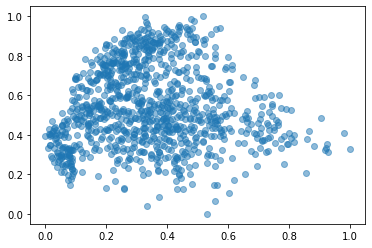

In [135]:
plt.scatter(normalized_PCA_train_x[:, 0], normalized_PCA_train_x[:, 1], cmap='Spectral', alpha=0.5)

**Q1: In the normalization methods, what is the meaning of offset and divisor, respectively?**

A : offset mean : 

**Q2: After normalization, how does the data range change?**

Hint: Try np.mean(X_normalized, axis=0), np.std(X_normalized, axis=0), np.min(X_normalized, axis=0), np.max(X_normalized, axis=0), np.median(X_normalized, axis=0).

In [116]:
# a distance function
def Euclidean_distance(vecA, vecB):
    return np.sqrt(sum(np.power([a-b for a,b in zip(vecA, vecB)],2)))

### Step(2). Initialize centroids

In [117]:
k = int(input("How many cluster do you want? "))
print(k)

How many cluster do you want? 10
10


In [118]:
import random

def init_centroids_random(dataset, k):
    """
    Arguments:
    dataset -- Numpy array of PCA applied data
    k -- the number of clusters
    """
    centroids = {}
    init_centroids = random.sample(range(0,len(dataset)),k)
    
    for i in range(k) : 
        centroids[i] = dataset[i]
    return centroids

In [119]:
def init_centroids_index(dataset, k):
    """
    Arguments:
    dataset -- Numpy array of PCA applied data
    k -- the number of clusters
    """
    centroids = {}
    for i in range(k):  # first k instances become the initial centroids
        centroids[i] = dataset[i]
    return centroids

In [120]:
# initialize_centroids(centroids, sub_PCA_train_x)
centroids = init_centroids_random(sub_PCA_train_x, k)

In [121]:
## Change centroids value to dataframe. 
cet_df = pd.DataFrame(centroids).transpose()
cet_df.columns = ['X','Y']
cet_df.head()

,X,Y
0,0.461537,-1.246613
1,3.921639,-1.251909
2,-0.203693,1.548121
3,-3.148431,-2.295988
4,-1.442720,2.871644


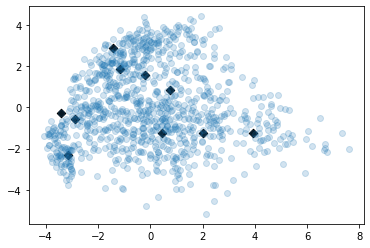

In [122]:
## Plot random centroids on the dataset

plt.figure()
plt.scatter(cet_df['X'], cet_df['Y'], color = 'black', marker = 'D')
plt.scatter(sub_PCA_train_x[:, 0], sub_PCA_train_x[:, 1], alpha = 0.2)

### Step(3). (Re)assigning every datas to its _closest centroid_

In [123]:
def re_assign_data(dataset, centroids):
    """
    Arguments:
    dataset -- Numpy array of PCA applied data
    centroids -- A dictionary of centroids
    """
    cluster_memberships = {}
    for i in centroids :
        cluster_memberships[i] = []
        
    for row in dataset : 
        dist_to_centroids = [Euclidean_distance(row, centroids[c]) for c in centroids]
        
        membership = dist_to_centroids.index(min(dist_to_centroids))
        cluster_memberships[membership].append(row)
    
    # (Re)assigning every instance to its closest centroid
        
    return cluster_memberships

### Step(4). Recalculate average of each cluster and calculate SSE value

In [127]:
def re_calc_avg_sse(centroids, cluster_memberships):
    """
    Arguments:
    centroids -- A dictionary of centroids
    memberships -- A dictionary data which is clustered by key(key: clustered group, value: values of that group)
    """
    curr_sse = 0
    
    # Re-calculate the average of each cluster and calculate SSE.
    for membership in cluster_memberships:
        ## YOUR CODE STARTS HERE
        centroids[membership] = np.average(cluster_memberships[membership], axis = 0)

        for row in cluster_memberships[membership]:
            curr_sse += np.power(Euclidean_distance(row, centroids[membership]), 2)
    
    return centroids, curr_sse            

### Step(5). Iterate STEP3 and STEP4 until SSE is less than ‘tol’ value 


In [125]:
## k-Means algorithm
def kmeans(dataset, k, max_iter = 300, tol = 0.001):
    centroids = init_centroids_random(dataset, k)
    
    ## 1. Initiate SSE which is key metric in k-means clustering (sse = sum of squared error) into 'np.inf'
    curr_sse = np.inf

    ## 2. Clustering
    for i in range(max_iter):

        ## (Re)Aassign datas to its closest centroids
        cluster_memberships = re_assign_data(dataset, centroids)


        ## Re-calculate the average of each cluster and calculate SSE.
        prev_sse = curr_sse
        centroids, curr_sse = re_calc_avg_sse(centroids, cluster_memberships)

        ## Plot center points
        plt.figure(i)
        c_df = pd.DataFrame(centroids).transpose()
        plt.scatter(c_df.loc[:, 0], c_df.loc[:, 1], color='black', marker='x')

        ## Plot assigned data
        for key in cluster_memberships:
            plt.scatter(*zip(*cluster_memberships[key]), alpha=0.2)
            plt.title('k={} '.format(k) + ' SSE=' + str(curr_sse))

        plt.show()
        print('iteration#{} | prev_sse= {:.4f};  curr_sse= {:.4f}'.format(i, prev_sse, curr_sse))

        # Terminal Condition
        if (prev_sse - curr_sse) / curr_sse < tol:
            break

    return cluster_memberships, curr_sse

**Q3: Before the iterations, how are the centroids defined?**

**Q4: One metric to evaluate the clustering results is sum of squared error (SSE). Describe the meaning of SSE in terms of the relationship between data and centroids**

**Q5: What is the terminal condition? Describe it with `tol` and `max_iter`.**

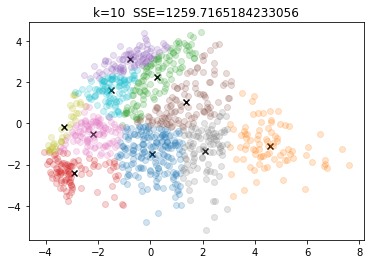

iteration#0 | prev_sse= inf;  curr_sse= 1259.7165


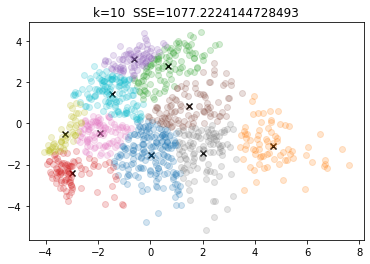

iteration#1 | prev_sse= 1259.7165;  curr_sse= 1077.2224


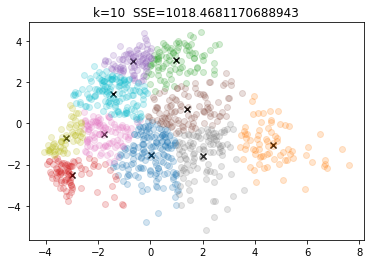

iteration#2 | prev_sse= 1077.2224;  curr_sse= 1018.4681


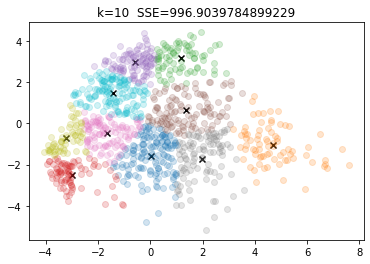

iteration#3 | prev_sse= 1018.4681;  curr_sse= 996.9040


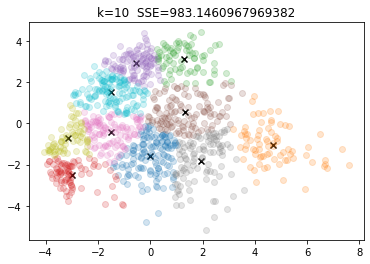

iteration#4 | prev_sse= 996.9040;  curr_sse= 983.1461


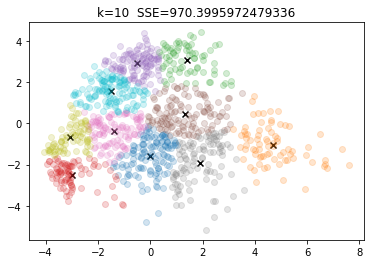

iteration#5 | prev_sse= 983.1461;  curr_sse= 970.3996


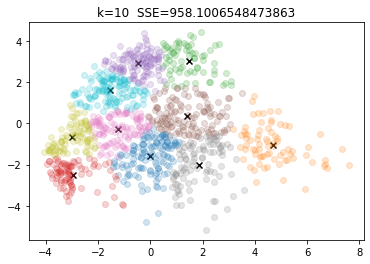

iteration#6 | prev_sse= 970.3996;  curr_sse= 958.1007


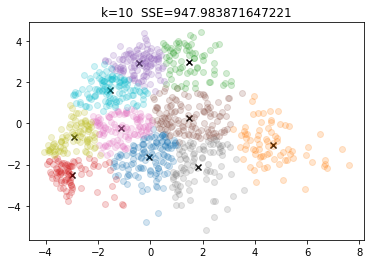

iteration#7 | prev_sse= 958.1007;  curr_sse= 947.9839


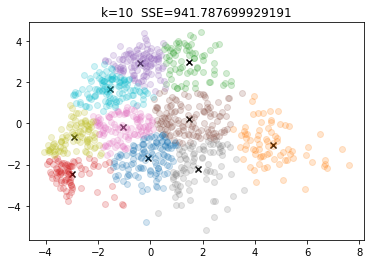

iteration#8 | prev_sse= 947.9839;  curr_sse= 941.7877


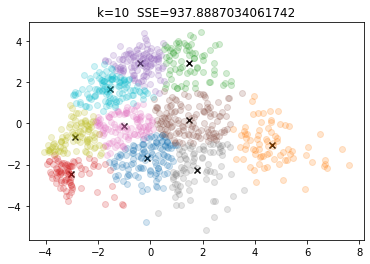

iteration#9 | prev_sse= 941.7877;  curr_sse= 937.8887


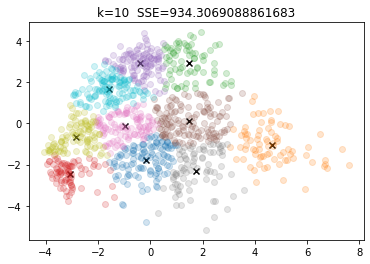

iteration#10 | prev_sse= 937.8887;  curr_sse= 934.3069


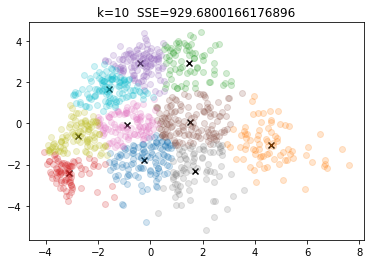

iteration#11 | prev_sse= 934.3069;  curr_sse= 929.6800


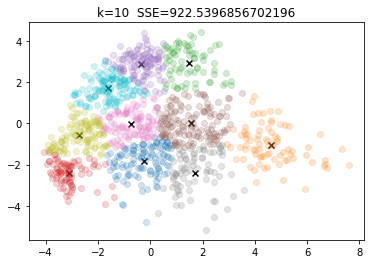

iteration#12 | prev_sse= 929.6800;  curr_sse= 922.5397


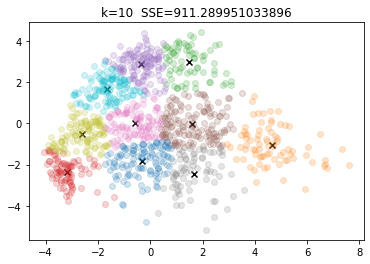

iteration#13 | prev_sse= 922.5397;  curr_sse= 911.2900


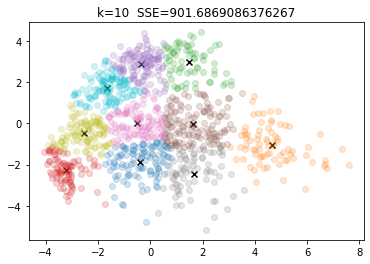

iteration#14 | prev_sse= 911.2900;  curr_sse= 901.6869


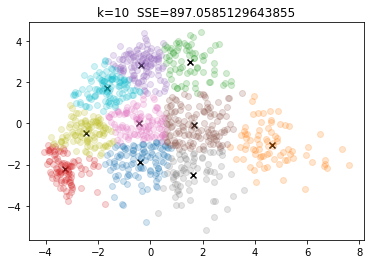

iteration#15 | prev_sse= 901.6869;  curr_sse= 897.0585


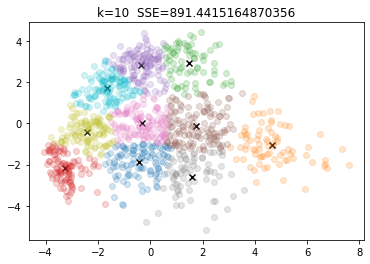

iteration#16 | prev_sse= 897.0585;  curr_sse= 891.4415


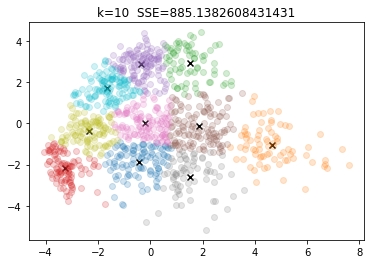

iteration#17 | prev_sse= 891.4415;  curr_sse= 885.1383


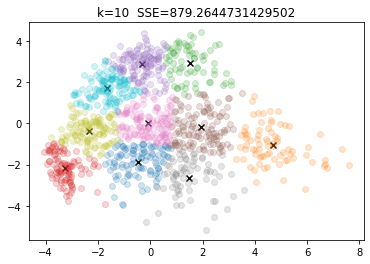

iteration#18 | prev_sse= 885.1383;  curr_sse= 879.2645


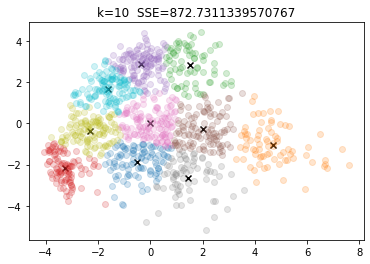

iteration#19 | prev_sse= 879.2645;  curr_sse= 872.7311


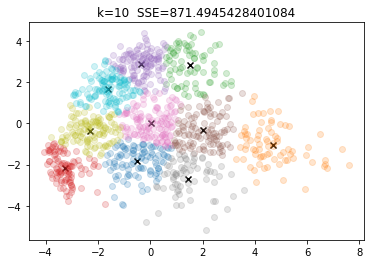

iteration#20 | prev_sse= 872.7311;  curr_sse= 871.4945


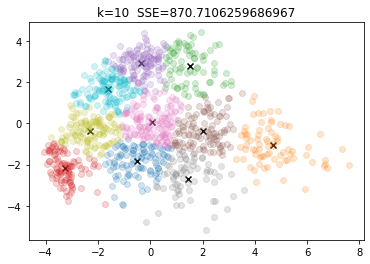

iteration#21 | prev_sse= 871.4945;  curr_sse= 870.7106


In [128]:
cluster_memberships, curr_sse = kmeans(sub_PCA_train_x,k)

----
### Step(6) Using sklearn library
- ___KMeans(n_clusters=)___ 

In [129]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = k)
model.fit(PCA_train_x)

result = model.predict(PCA_test_x)

- Check ___crosstab___

In [131]:
import pandas as pd

df = pd.DataFrame({'labels': test_y['label'], 'result': result})
ct = pd.crosstab(df['labels'], df['result'])
ct

result,0,1,2,3,4,5,6,7,8,9
labels,,,,,,,,,,
0,3,58,1,71,342,2,494,9,0,0
1,141,0,0,1,0,19,0,0,974,0
2,88,174,8,219,157,292,22,8,29,35
3,114,365,3,102,30,366,6,1,7,16
4,56,0,377,31,6,0,1,252,2,257
5,144,150,17,272,127,91,15,17,4,55
6,81,29,18,338,269,57,27,97,7,35
7,92,0,410,29,1,4,0,115,11,366
8,149,63,16,306,87,256,30,19,11,37
